In [4]:
import utils

In [1]:
import os
#from google.colab import drive
#drive.mount('/content/drive')
#os.chdir('/content/drive/MyDrive/Github/dus_mm/')
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import utils
import glob

from matplotlib import pyplot as plt
import seaborn as sb
os.chdir('data')

columnsX = ['freq','AX','BX','BY','CY','CX','DX','DY','AY']
columnsY = ['AX','BX','BY','CY','CX','DX','DY','AY','AQ','AL','BQ','BL','CQ','CL','DQ','DL']
columnsYout = ['AQ','AL','BQ','BL','CQ','CL','DQ','DL','X','Y','Q','L']

ModuleNotFoundError: No module named 'keras'

In [5]:
utils.create_out(5000)

,AX,BX,BY,CY,CX,DX,DY,AY,AQ,AL,BQ,BL,CQ,CL,DQ,DL
0,2.0,2.0,8.0,8.0,0.0,0.0,6.0,6.0,11.0,18.0,8.0,11.0,16.0,0.0,0.0,11.0
1,0.0,1.0,7.0,7.0,6.0,6.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,8.0,2.0,0.0
2,0.0,0.0,20.0,20.0,4.0,4.0,16.0,16.0,0.0,3.0,3.0,16.0,0.0,6.0,8.0,0.0
3,3.0,4.0,0.0,0.0,3.0,4.0,0.0,0.0,9.0,13.0,13.0,11.0,0.0,13.0,13.0,0.0
4,10.0,10.0,8.0,8.0,2.0,2.0,0.0,0.0,0.0,18.0,8.0,0.0,6.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5.0,5.0,6.0,6.0,7.0,7.0,18.0,18.0,5.0,13.0,0.0,5.0,5.0,0.0,0.0,10.0
4996,4.0,4.0,9.0,10.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12.0,0.0,0.0
4997,2.0,2.0,2.0,2.0,0.0,0.0,4.0,4.0,5.0,8.0,9.0,0.0,0.0,8.0,8.0,26.0
4998,8.0,8.0,13.0,13.0,0.0,0.0,5.0,5.0,0.0,19.0,4.0,2.0,18.0,4.0,4.0,0.0


In [2]:
X = pd.DataFrame()
y = pd.DataFrame()
numb_files = len(glob.glob('data_output*'))
for i in glob.glob('data_output*'): 
    numb = i[11]
    if (numb == 'data_output.txt'):
        numb = ''
    y = pd.concat([y,pd.read_table(os.path.join('data_output%s.txt' % numb), header = 0, names = columnsY, 
                                   index_col = False, sep='\s+', engine='python', dtype ='float')], ignore_index = 1)
    X = pd.concat([X,pd.read_table(os.path.join('data_input%s.txt' % numb), header = 0, names = columnsX, 
                                   index_col = False, sep='\s+', engine='python', dtype ="float")], ignore_index = 1)
X = utils.init_in(X)
y = utils.decomposition(y)

drop_ind = y.loc[(y == 0).all(axis = 1)].index
X = X.drop(drop_ind).reset_index(drop=True)
y = y.drop(drop_ind).reset_index(drop=True)

In [ ]:
deltaf = y['X'] + y['Y'] + y['Q'] + y['L']
deltaf.name ='deltaf'
y  = y.drop(columns = ['X','Y','Q','L'])
y = pd.concat([y,deltaf],axis = 1)

In [ ]:
ind0 = y['deltaf'][y['deltaf'] == 0].index
X = X.drop(ind0).reset_index(drop=True)
y = y.drop(ind0).reset_index(drop=True)

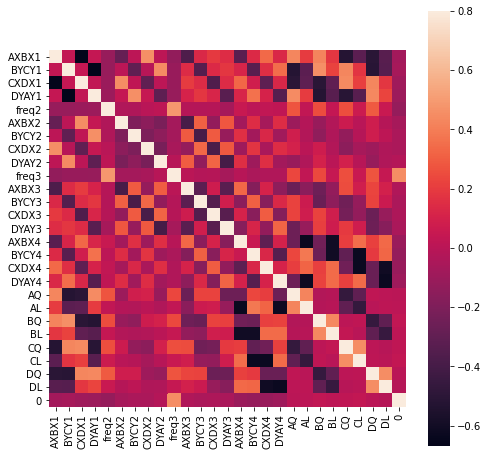

In [ ]:
train_examples = pd.concat([X,y],axis = 1)
C_mat = train_examples.corr()
fig = plt.figure(figsize = (8,8))
#X1 = X.drop(columns = ['freq3'])
sb.heatmap(C_mat, vmax = .8, square = True)

In [ ]:
X.hist(figsize = (12,10))
plt.show()

In [3]:
number_train = round(len(X)*0.95)
X_train = X.loc[:number_train]
X_test = X.loc[number_train:]
X_test = X_test.reset_index(drop=True)

y_train = y.loc[:number_train]
y_test = y.loc[number_train:]
y_test = y_test.reset_index(drop=True)
input_layer = X_test.shape[1]
hidden_layer = 15
output_layer = y.shape[1]

In [4]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = 18, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(12, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mean_squared_error'])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2432      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 12)                3084      
Total params: 235,916
Trainable params: 235,916
Non-trainable params: 0
__________________________________________________

In [5]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
75/75 [==============================] - 17s 16ms/step - loss: 71.2381 - mean_squared_error: 71.2381 - val_loss: 68.0994 - val_mean_squared_error: 68.0994

Epoch 00001: val_loss improved from inf to 68.09940, saving model to Weights-001--68.09940.hdf5
Epoch 2/500
75/75 [==============================] - 1s 7ms/step - loss: 55.8094 - mean_squared_error: 55.8094 - val_loss: 57.4912 - val_mean_squared_error: 57.4912

Epoch 00002: val_loss improved from 68.09940 to 57.49118, saving model to Weights-002--57.49118.hdf5
Epoch 3/500
75/75 [==============================] - 1s 7ms/step - loss: 44.9638 - mean_squared_error: 44.9638 - val_loss: 40.2446 - val_mean_squared_error: 40.2446

Epoch 00003: val_loss improved from 57.49118 to 40.24464, saving model to Weights-003--40.24464.hdf5
Epoch 4/500
75/75 [==============================] - 1s 8ms/step - loss: 31.4748 - mean_squared_error: 31.4748 - val_loss: 39.2700 - val_mean_squared_error: 39.2700

Epoch 00004: val_loss improved from 

In [6]:
wights_file = 'Weights-468--1.37398.hdf5'
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mean_squared_error'])

In [27]:
predictions = NN_model.predict(X_test)
yy = pd.DataFrame(np.round(predictions), columns = y_test.columns)

In [28]:
y_test

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,0.0,6.0,0.0,0.0,2.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0
1,0.0,6.0,0.0,0.0,2.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0
2,0.0,6.0,0.0,0.0,2.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0
3,0.0,6.0,0.0,0.0,2.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0
4,0.0,6.0,0.0,0.0,2.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.0,6.0,0.0,0.0,2.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0
175,0.0,6.0,0.0,0.0,2.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0
176,0.0,6.0,0.0,0.0,2.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0
177,0.0,6.0,0.0,0.0,2.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0


In [24]:
yy - y_test

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0
1,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0
2,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0
3,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0
4,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0
175,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0
176,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0
177,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0


In [ ]:
yy - y_test

,AL,AQ,BL,BQ,CL,CQ,DL,DQ,L,Q,X,Y,deltaf
0,-1.0,-2.0,1.0,0.0,-0.0,0.0,-0.0,-1.0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,NaN,NaN,NaN,NaN,NaN
2,-0.0,-0.0,0.0,-0.0,0.0,1.0,-2.0,0.0,NaN,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,2.0,-1.0,0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN
4,-2.0,0.0,0.0,-0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.0,-0.0,0.0,1.0,-0.0,1.0,-0.0,0.0,NaN,NaN,NaN,NaN,NaN
128,-1.0,1.0,0.0,-2.0,-0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
129,0.0,-0.0,0.0,0.0,-0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
130,-0.0,-1.0,-0.0,-1.0,-1.0,0.0,0.0,-0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
yy - y_test

,AL,AQ,AX,AY,BL,BQ,BX,BY,CL,CQ,CX,CY,DL,DQ,DX,DY,L,Q,X,Y
0,0.03,8.24,NaN,NaN,9.17,0.04,NaN,NaN,22.64,9.17,NaN,NaN,-2.59,-11.97,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
os.chdir('/content/drive/MyDrive/Github/dus_mm/data/')
XX = pd.read_table(os.path.join('data.txt'), header = 0, names = columnsX, index_col = False, sep='\s+', engine='python', dtype ="float")
XX = utils.init_in(XX)
predictions = NN_model.predict(XX)
yy = np.abs(pd.DataFrame(predictions.astype('float'), columns = columnsYout))
#yy = utils.integration(yy,0.72*1.33,1.33) # перемычки 30 мкм вместо 40 мкм 1.33

In [ ]:
yy = np.abs(pd.DataFrame(np.round(predictions,0), columns = columnsYout))

In [ ]:
yy = utils.decomposition(yy)

In [8]:
XX

,AXBX1,BYCY1,CXDX1,DYAY1,freq2,AXBX2,BYCY2,CXDX2,DYAY2,freq3,AXBX3,BYCY3,CXDX3,DYAY3,AXBX4,BYCY4,CXDX4,DYAY4
number,,,,,,,,,,,,,,,,,,
0,0.059,0.436,1.0,0.475,0.174,1.0,0.36,0.01,0.22,0.549,0.05,1.0,0.05,0.574,0.297,0.574,0.149,1.0


In [38]:
XX

,AXBX1,BYCY1,CXDX1,DYAY1,freq2,AXBX2,BYCY2,CXDX2,DYAY2,freq3,AXBX3,BYCY3,CXDX3,DYAY3,AXBX4,BYCY4,CXDX4,DYAY4
number,,,,,,,,,,,,,,,,,,
0,0.0,0.239,1.0,0.0,0.195,1.0,0.344,0.0,0.255,0.567,0.0,1.0,0.0,0.661,0.429,0.529,0.31,1.0


In [16]:
np.round(yy*1.33)

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,0.0,0.0,1.0,3.0,12.0,22.0,0.0,0.0,86.0,0.0,6.0,2.0


In [11]:
np.round(yy*1.33)

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,0.0,0.0,1.0,3.0,12.0,22.0,0.0,0.0,86.0,0.0,6.0,2.0


In [13]:
np.round(yy)

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,0.0,0.0,0.0,2.0,12.0,16.0,0.0,0.0,57.0,0.0,5.0,2.0


In [ ]:
np.round(yy)

,AX,BX,BY,CY,CX,DX,DY,AY,AQ,AL,BQ,BL,CQ,CL,DQ,DL
0,18.0,18.0,1.0,1.0,19.0,19.0,1.0,1.0,7.0,0.0,0.0,7.0,7.0,23.0,0.0,9.0


In [ ]:
yy.round()

,AX,BX,BY,CY,CX,DX,DY,AY,AQ,AL,BQ,BL,CQ,CL,DQ,DL
0,12.0,12.0,28.0,28.0,9.0,9.0,6.0,6.0,11.0,0.0,0.0,14.0,11.0,4.0,0.0,11.0


In [ ]:
yy.iloc[:,:8] = 2*yy.iloc[:,:8]

In [ ]:
yy.round(2)

In [ ]:
yy = utils.integration(np.round(yy))

In [ ]:
yyy = [8,2,2,20,21,13,5,13,7,4,1,9,8,22,13,17]
yyy = pd.DataFrame([yyy], columns = columnsY,  dtype ="float")
yyy = utils.decomposition(yyy)
yyy = utils.integration(yyy)

In [ ]:
yy

In [ ]:
yy = np.abs(pd.DataFrame(np.round(predictions,1), columns = columnsYout))

In [ ]:
yy = utils.integration(predictions, 0.73)

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = 14)

In [ ]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

# Get the mean absolute error on the validation data
predicted = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted)
print('Random forest validation MAE = ', MAE)

In [ ]:
help(XGBRegressor)

In [ ]:
XGBModel = XGBRegressor()
XGBModel.fit(train_X,train_y , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(val_X)
MAE = mean_absolute_error(val_y , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

In [ ]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
#X, y = make_regression(n_samples=10, n_targets=3, random_state=1)
MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, y_train).predict(X_test)

array([[ 1.469652  , -0.43051421,  3.01227049, ...,  3.85549802,
        16.59906341,  0.77232348],
       [ 9.92457193,  2.32376166,  3.48170872, ...,  1.2894693 ,
         9.94125348,  4.80633986],
       [-0.26533863, -0.42262961,  3.85812676, ..., -1.40101877,
        17.58549324,  8.70136762],
       ...,
       [ 0.10674917,  0.55564049,  0.04823925, ...,  8.94741055,
        13.24651881,  3.10696071],
       [ 6.50992537,  0.27119043,  8.91812086, ..., -0.77254395,
         7.06702158,  5.76281579],
       [ 0.63955107,  9.49687352, -0.07616824, ...,  0.02229664,
         4.86526759, 10.71283683]])

In [ ]:
yy = pd.DataFrame(np.round(_),columns = y_test.columns)

In [ ]:
y_test

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,0.0,0.0,0.0,12.0,24.0,10.0,0.0,0.0,4.0,0.0,16.0,0.0
1,12.5,4.5,2.5,21.5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,16.0
2,0.0,0.0,3.0,4.0,0.0,20.0,0.0,0.0,20.0,0.0,0.0,0.0
3,18.0,20.0,8.0,21.0,0.0,0.0,0.0,0.0,0.0,30.0,36.0,0.0
4,11.0,0.0,16.0,0.0,0.0,6.0,0.0,10.0,0.0,0.0,40.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,3.0,8.0,2.0,6.0,0.0,0.0,0.0,0.0,10.0,16.0,0.0
107,23.0,17.0,7.0,13.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,12.0
108,0.0,0.0,0.0,0.0,6.0,0.0,15.0,4.0,0.0,12.0,12.0,0.0
109,8.0,0.0,12.0,0.0,0.0,4.0,0.0,8.0,32.0,0.0,0.0,0.0


In [ ]:
yy

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,1.0,-0.0,3.0,10.0,24.0,14.0,2.0,0.0,8.0,4.0,17.0,1.0
1,10.0,2.0,3.0,17.0,-0.0,-0.0,0.0,-0.0,6.0,1.0,10.0,5.0
2,-0.0,-0.0,4.0,6.0,3.0,19.0,2.0,1.0,18.0,-1.0,18.0,9.0
3,6.0,23.0,11.0,21.0,9.0,1.0,3.0,3.0,1.0,18.0,23.0,-1.0
4,15.0,-1.0,12.0,1.0,0.0,8.0,1.0,7.0,9.0,5.0,19.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,4.0,7.0,3.0,9.0,0.0,-0.0,0.0,-1.0,10.0,9.0,4.0
107,23.0,14.0,10.0,10.0,-1.0,-1.0,2.0,0.0,27.0,-2.0,4.0,12.0
108,0.0,1.0,0.0,1.0,8.0,2.0,11.0,3.0,-0.0,9.0,13.0,3.0
109,7.0,0.0,9.0,-0.0,0.0,5.0,1.0,6.0,30.0,-1.0,7.0,6.0


In [ ]:
y_test - yy

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,-1.0,0.0,-3.0,2.0,0.0,-4.0,-2.0,0.0,-4.0,-4.0,-1.0,-1.0
1,2.5,2.5,-0.5,4.5,0.0,0.0,0.0,0.0,-1.0,-1.0,-10.0,11.0
2,0.0,0.0,-1.0,-2.0,-3.0,1.0,-2.0,-1.0,2.0,1.0,-18.0,-9.0
3,12.0,-3.0,-3.0,0.0,-9.0,-1.0,-3.0,-3.0,-1.0,12.0,13.0,1.0
4,-4.0,1.0,4.0,-1.0,0.0,-2.0,-1.0,3.0,-9.0,-5.0,21.0,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,-1.0,1.0,-1.0,-3.0,0.0,0.0,0.0,1.0,0.0,7.0,-4.0
107,0.0,3.0,-3.0,3.0,1.0,1.0,-2.0,0.0,1.0,2.0,-4.0,0.0
108,0.0,-1.0,0.0,-1.0,-2.0,-2.0,4.0,1.0,0.0,3.0,-1.0,-3.0
109,1.0,0.0,3.0,0.0,0.0,-1.0,-1.0,2.0,2.0,1.0,-7.0,-6.0
